# r/BitcoinMarkets Comment Sentiment Analysis from 29/10/22 - 12/11/22

## Introduction

The goal of this project is to analyse the sentiment intensity of comments from the r/BitcoinMarkets subreddit over the period 29th October 2022 - 12th November 2022. 

This project will analyse, prepare, plot the data and seek to explain the findings of the analysis. 

Here are a few questions that this project has sought to answer:

- What is the composition of the sentiment of comments when organised into positive, neutral and negative comments?
- Does the sentiment score increase or decrease over time?
- Does an increase or decrease in the sentiment score correlate with the collapse of the cryptocurrency exchange FTX?

**Data sources:**

'comments.csv' was generated using the'subreddits-comments-dl' tool created by pistocop. A link to the github repository for this tool can be found here: https://github.com/pistocop/subreddit-comments-dl

## Importing Libraries, Reading in Data and Organising

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns
import re
import wordcloud
import nltk
from wordcloud import WordCloud

### comments

The 'comments.csv' conatins information on the comments webscraped from the BitcoinMarkets subreddit from the 29th October - 12th November. The columns of the dataset include:
- **subreddit** - The subreddit the comments have been scraped from. In this case all of them have the value 'BitcoinMarkets'
- **id** - The primary key of each comment. Each comment has a unique id.
- **submission_id** - The id of the submission (post) in which each comment is located.
- **body** - The comment string data.
- **created_utc** - The time at which the comment was made. This is represented in unix time.
- **parent_id** - The comments on Reddit are organised in a tree structure. The comment at the top of a particular tree is regarded as the 'parent' comment. This column specifies the parent comment of the tree to which the comment in each row belongs.
- **permalink** - Link to the comment.

In [2]:
# Read in data
df = pd.read_csv('comments.csv', index_col=None)
df.head(10)

,subreddit,id,submission_id,body,created_utc,parent_id,permalink
0,BitcoinMarkets,iubyx2i,yg9cyo,"#New post: [\[Daily Discussion\] - Sunday, Oct...",1667102499,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
1,BitcoinMarkets,iu7ma5x,yg9cyo,"This is the part right before people say ""fuck...",1667017143,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
2,BitcoinMarkets,iu93bpo,yg9cyo,Upper bound of the range we’ve been in since J...,1667054910,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
3,BitcoinMarkets,iu9j7yn,yg9cyo,"Well this has been fun for a weekend, no matte...",1667061823,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
4,BitcoinMarkets,iu9fozb,yg9cyo,"I like optimism more than pessism, and that's ...",1667060331,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
5,BitcoinMarkets,iuajvdr,yg9cyo,"I bought some I-Bonds yesterday, the last day ...",1667077384,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
6,BitcoinMarkets,iu930uc,yg9cyo,"Almost 21k, should we buckle our bootstraps?",1667054773,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
7,BitcoinMarkets,iu81dot,yg9cyo,[deleted],1667028870,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
8,BitcoinMarkets,iuabu30,yg9cyo,Just as an interesting reference to where we a...,1667073980,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...
9,BitcoinMarkets,iu9ptb9,yg9cyo,"So, Elon bought twitter and the doggy coin pum...",1667064602,t3_yg9cyo,/r/BitcoinMarkets/comments/yg9cyo/daily_discus...


### Exploring the Data.

In [3]:
# Getting overview of the dataframe using the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      5243 non-null   object
 1   id             5243 non-null   object
 2   submission_id  5243 non-null   object
 3   body           5243 non-null   object
 4   created_utc    5243 non-null   int64 
 5   parent_id      5243 non-null   object
 6   permalink      5243 non-null   object
dtypes: int64(1), object(6)
memory usage: 286.9+ KB


In [4]:
# We don't have any null values but we do have some values which are deleted e.g. row at index(7)
# Number of rows where df['body'] has the value '[deleted]'
df[df['body'] == '[deleted]'].shape

(66, 7)

In [5]:
# Organise the df by dropping columns we don't need - 'subreddit' and 'permalink'
comments_df = df.drop(df[['subreddit', 'permalink']], axis=1)

# Replace the '[deleted]' values in the 'body' column with null values, then drop rows with null values.
comments_df['body'] = comments_df['body'].replace('[deleted]', np.nan)
comments_df = comments_df.dropna(how='any') \
                         .reset_index(drop=True)

# Increase column width from 50 to 1000 so I can see the values in 'body' column
pd.options.display.max_colwidth = 1000

comments_df.head()

,id,submission_id,body,created_utc,parent_id
0,iubyx2i,yg9cyo,"#New post: [\[Daily Discussion\] - Sunday, October 30, 2022 →](https://www.reddit.com/r/BitcoinMarkets/comments/yh3z8s/daily_discussion_sunday_october_30_2022/)",1667102499,t3_yg9cyo
1,iu7ma5x,yg9cyo,"This is the part right before people say ""fuck, i had months to buy and I missed it... again""\n\nI notice last couple bear markets were both concluded around 1 year after the bull peak.\n\nhttps://i.imgur.com/sMJC0JJ.jpg \n\nDec 2013 Peak -> first week of Jan 2015 Bottom\n\nDec 2017 Peak -> last week of Nov 2018 Bottom\n\nNov 2021 Peak -> last week of Oct 2022 bottom??\n\nIf the same thing happens then we are passing the worst of it and we will have a new accumulation period as it consolidates in the higher ranges.\n\nThat or we will just get slapped down again, but right now I think the 1 year winter theory is pretty convincing especially with this price action this week.",1667017143,t3_yg9cyo
2,iu93bpo,yg9cyo,"Upper bound of the range we’ve been in since June is $25.1k. Lower bound of the range is $17.7k. Still in the range until either the upper bound or lower bound is broken. Which will break first?\n\nFed meeting is November 2 and a 75 BP rate hike is priced in. The toss up is the December meeting where it’s nearly an even split being priced in by futures between a 50 BP rate hike or a 75 BP rate hike. Powell’s comments at the press conference on Wednesday should provide further clarity on what to expect in December. Jobs reports and CPI data for October and November will also release prior to the December 14 meeting.\n\nIdk what happens next but the end of the year should be exciting, whether it ends up being to the upside or downside is the question but crab season is probably coming to an end either way.",1667054910,t3_yg9cyo
3,iu9j7yn,yg9cyo,"Well this has been fun for a weekend, no matter how it turns out. I’m enjoying chart-checking a lot today.\n\n\nI am not sure how I feel about the 1% of my portfolio that I have in doggy coin turning green first before any of my other coins. But I guess that’s part of what keeps crypto interesting.",1667061823,t3_yg9cyo
4,iu9fozb,yg9cyo,"I like optimism more than pessism, and that's what I've seen more in here recently which is nice, but I think we're still just good ol' ranging. Absolutely neutral imo. Looks like Elon let the dogs out again. Let em play.\n\nWhat's it gonna take for you to think ""we're back bois!?"" Back into the mid-30s would do it for me as long as it wasn't a 2 day pump n dump.",1667060331,t3_yg9cyo


## Data Cleaning

Here, I will take steps to clean the comment data before applying the natural language analysis tool. This includes:

- Using a function to remove unnecessary characters from the comment string data such as newline characters and special characters.
- Removing stop words (words such as 'the' or 'who' which are filtered out because they are insignificant in the analysis of lexical sentiment).
- Tokenzing (breaking down the text into smaller parts) so that the sentiment analyser can better interpret the meaning of the text.
- Changing the datatype of the 'date' column from integer to datetime.


In [6]:
# Clean the text

# Create function to clean comments
import string

def cleantxt(text):
    text = re.sub(r'\\n', ' ', text) # Removes '\n'
    text = re.sub(r'https?:\/\/\S+', '', text) # Removes hyperlink
    text = ''.join([char if char not in string.punctuation else ' ' for char in text]) #removes punctuation
    text = re.sub(' +', ' ', text) #removes extra spaces
    text = re.sub('[0–9]+', '', text) # removes numbers
    text = re.sub('[^A-Za-z0–9_. ]+','',text) #removes special characters
    
    return text    

# Clean text using function    
comments_df['body'] = comments_df['body'].apply(cleantxt)

# Show clean text
comments_df.head()

,id,submission_id,body,created_utc,parent_id
0,iubyx2i,yg9cyo,New post Daily Discussion Sunday October,1667102499,t3_yg9cyo
1,iu7ma5x,yg9cyo,This is the part right before people say fuck i had months to buy and I missed it again I notice last couple bear markets were both concluded around year after the bull peak Dec Peak first week of Jan Bottom Dec Peak last week of Nov Bottom Nov Peak last week of Oct bottom If the same thing happens then we are passing the worst of it and we will have a new accumulation period as it consolidates in the higher ranges That or we will just get slapped down again but right now I think the year winter theory is pretty convincing especially with this price action this week,1667017143,t3_yg9cyo
2,iu93bpo,yg9cyo,Upper bound of the range weve been in since June is k Lower bound of the range is k Still in the range until either the upper bound or lower bound is broken Which will break first Fed meeting is November and a BP rate hike is priced in The toss up is the December meeting where its nearly an even split being priced in by futures between a BP rate hike or a BP rate hike Powells comments at the press conference on Wednesday should provide further clarity on what to expect in December Jobs reports and CPI data for October and November will also release prior to the December meeting Idk what happens next but the end of the year should be exciting whether it ends up being to the upside or downside is the question but crab season is probably coming to an end either way,1667054910,t3_yg9cyo
3,iu9j7yn,yg9cyo,Well this has been fun for a weekend no matter how it turns out Im enjoying chart checking a lot today I am not sure how I feel about the of my portfolio that I have in doggy coin turning green first before any of my other coins But I guess thats part of what keeps crypto interesting,1667061823,t3_yg9cyo
4,iu9fozb,yg9cyo,I like optimism more than pessism and that s what I ve seen more in here recently which is nice but I think we re still just good ol ranging Absolutely neutral imo Looks like Elon let the dogs out again Let em play What s it gonna take for you to think we re back bois Back into the mid s would do it for me as long as it wasn t a day pump n dump,1667060331,t3_yg9cyo


In [7]:
# Loading stop words and removing negative stop words from the list (negative stop words will be important in determining sentiment of text).
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
words_to_keep = ['don', 'don’t', 'ain', 'aren', 'aren’t', 'couldn', 'couldn’t', 'didn', 'didn’t', 'doesn', 'doesn’t', 'hadn', 'hadn’t', 'hasn', 'hasn’t', 'haven', 'haven’t', 'isn', 'isn’t', 'ma', 'mightn', 'mightn’t', 'mustn', 'mustn’t', 'needn', 'needn’t', 'shan', 'shan’t', 'no', 'nor', 'not', 'shouldn', 'shouldn’t', 'wasn', 'wasn’t', 'weren', 'weren’t', 'won', 'won’t', 'wouldn', 'wouldn’t']
my_stop_words = [word for word in stop_words]

# Using a loop to make sure we keep the negative stop words.
for word in my_stop_words:
    if word in words_to_keep:
        my_stop_words.remove(word)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Tokenizing (splitting into smaller parts or 'tokens') the text

from nltk.tokenize import word_tokenize

# Removing stop words from the comments
def remove_stop_words(text):
    tokens = word_tokenize(text)
    text_with_no_stop_words = [token for token in tokens if not token in my_stop_words]
    reformed_text = ' '.join(text_with_no_stop_words)
 
    return reformed_text

# Using lambda to apply the stop word removal function to the text.
comments_df['body'] = comments_df['body'].apply(lambda x: remove_stop_words(x))

In [9]:
# Applying the clean function has left us with some empty values in the 'body' column. Let's remove these.
comments_df['body'] = comments_df['body'].replace('', np.nan)
comments_df = comments_df.dropna(how='any') \
                         .reset_index(drop=True)

comments_df.head()

,id,submission_id,body,created_utc,parent_id
0,iubyx2i,yg9cyo,New post Daily Discussion Sunday October,1667102499,t3_yg9cyo
1,iu7ma5x,yg9cyo,This part right people say fuck months buy I missed I notice last couple bear markets concluded around year bull peak Dec Peak first week Jan Bottom Dec Peak last week Nov Bottom Nov Peak last week Oct bottom If thing happens passing worst new accumulation period consolidates higher ranges That get slapped right I think year winter theory pretty convincing especially price action week,1667017143,t3_yg9cyo
2,iu93bpo,yg9cyo,Upper bound range weve since June k Lower bound range k Still range either upper bound lower bound broken Which break first Fed meeting November BP rate hike priced The toss December meeting nearly even split priced futures BP rate hike BP rate hike Powells comments press conference Wednesday provide clarity expect December Jobs reports CPI data October November also release prior December meeting Idk happens next end year exciting whether ends upside downside question crab season probably coming end either way,1667054910,t3_yg9cyo
3,iu9j7yn,yg9cyo,Well fun weekend no matter turns Im enjoying chart checking lot today I not sure I feel portfolio I doggy coin turning green first coins But I guess thats part keeps crypto interesting,1667061823,t3_yg9cyo
4,iu9fozb,yg9cyo,I like optimism pessism I seen recently nice I think still good ol ranging Absolutely neutral imo Looks like Elon let dogs Let em play What gon na take think back bois Back mid would long wasn day pump n dump,1667060331,t3_yg9cyo


In [10]:
# Changing the values in the 'submission_id' column to aid readability/understanding

comments_df['submission_id'].unique()
# output of the above:
#     array(['yg9cyo', 'yh3z8s', 'yi04tb', 'yiy5pz', 'yiy5rq', 'yjuv4k',
#        'ykrneb', 'ylo8gt', 'ymiy7b', 'ymjjf6', 'yng1pw', 'yod8i3',
#        'yowuhj', 'ypbpf1', 'yq93yq', 'yr5tqr', 'ys1nr2', 'ysx0hp'],
#       dtype=object)

# All unique values in 'submission_id' correspond to a specific reddit post. We will rename the submission_ids as follows
sid = {'yg9cyo': '2022-10-29 Daily Discussion',
'yh3z8s': '2022-10-30 Daily Discussion',
'yi04tb': '2022-10-31 Daily Discussion',
'yiy5pz': 'Altcoin Discussion - November 2022',
'yiy5rq': '2022-11-01 Daily Discussion',
'yjuv4k': '2022-11-02 Daily Discussion',
'ykrneb': '2022-11-03 Daily Discussion',
'ylo8gt': '2022-11-04 Daily Discussion',
'ymiy7b': 'the fake out', 
'ymjjf6': '2022-11-05 Daily Discussion', 
'yng1pw': '2022-11-06 Daily Discussion', 
'yod8i3': '2022-11-07 Daily Discussion', 
'yowuhj': "Why isn't there more hype when we're in a bear market?...", 
'ypbpf1': '2022-11-08 Daily Discussion', 
'yq93yq': '2022-11-09 Daily Discussion', 
'yr5tqr': '2022-11-10 Daily Discussion', 
'ys1nr2': '2022-11-11 Daily Discussion', 
'ysx0hp': '2022-11-12 Daily Discussion'
}

comments_df['submission_id'].replace(sid, inplace=True)

comments_df.head()

,id,submission_id,body,created_utc,parent_id
0,iubyx2i,2022-10-29 Daily Discussion,New post Daily Discussion Sunday October,1667102499,t3_yg9cyo
1,iu7ma5x,2022-10-29 Daily Discussion,This part right people say fuck months buy I missed I notice last couple bear markets concluded around year bull peak Dec Peak first week Jan Bottom Dec Peak last week Nov Bottom Nov Peak last week Oct bottom If thing happens passing worst new accumulation period consolidates higher ranges That get slapped right I think year winter theory pretty convincing especially price action week,1667017143,t3_yg9cyo
2,iu93bpo,2022-10-29 Daily Discussion,Upper bound range weve since June k Lower bound range k Still range either upper bound lower bound broken Which break first Fed meeting November BP rate hike priced The toss December meeting nearly even split priced futures BP rate hike BP rate hike Powells comments press conference Wednesday provide clarity expect December Jobs reports CPI data October November also release prior December meeting Idk happens next end year exciting whether ends upside downside question crab season probably coming end either way,1667054910,t3_yg9cyo
3,iu9j7yn,2022-10-29 Daily Discussion,Well fun weekend no matter turns Im enjoying chart checking lot today I not sure I feel portfolio I doggy coin turning green first coins But I guess thats part keeps crypto interesting,1667061823,t3_yg9cyo
4,iu9fozb,2022-10-29 Daily Discussion,I like optimism pessism I seen recently nice I think still good ol ranging Absolutely neutral imo Looks like Elon let dogs Let em play What gon na take think back bois Back mid would long wasn day pump n dump,1667060331,t3_yg9cyo


In [11]:
# Change 'created_utc' column to datetime 
comments_df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# While we're at it, let's rename all columns
comments_df = comments_df.rename(columns={
    'id': 'comment_id',
    'submission_id': 'submission', 
    'body': 'comment',
    'created_utc': 'datetime',
    'parent_id': 'parent_comment_id'
})

comments_df.head()

,comment_id,submission,comment,datetime,parent_comment_id
0,iubyx2i,2022-10-29 Daily Discussion,New post Daily Discussion Sunday October,2022-10-30 04:01:39,t3_yg9cyo
1,iu7ma5x,2022-10-29 Daily Discussion,This part right people say fuck months buy I missed I notice last couple bear markets concluded around year bull peak Dec Peak first week Jan Bottom Dec Peak last week Nov Bottom Nov Peak last week Oct bottom If thing happens passing worst new accumulation period consolidates higher ranges That get slapped right I think year winter theory pretty convincing especially price action week,2022-10-29 04:19:03,t3_yg9cyo
2,iu93bpo,2022-10-29 Daily Discussion,Upper bound range weve since June k Lower bound range k Still range either upper bound lower bound broken Which break first Fed meeting November BP rate hike priced The toss December meeting nearly even split priced futures BP rate hike BP rate hike Powells comments press conference Wednesday provide clarity expect December Jobs reports CPI data October November also release prior December meeting Idk happens next end year exciting whether ends upside downside question crab season probably coming end either way,2022-10-29 14:48:30,t3_yg9cyo
3,iu9j7yn,2022-10-29 Daily Discussion,Well fun weekend no matter turns Im enjoying chart checking lot today I not sure I feel portfolio I doggy coin turning green first coins But I guess thats part keeps crypto interesting,2022-10-29 16:43:43,t3_yg9cyo
4,iu9fozb,2022-10-29 Daily Discussion,I like optimism pessism I seen recently nice I think still good ol ranging Absolutely neutral imo Looks like Elon let dogs Let em play What gon na take think back bois Back mid would long wasn day pump n dump,2022-10-29 16:18:51,t3_yg9cyo


## Sentiment Analysis of the comments using VADER

Here, we will use the NLTK library to download the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon. This is a dataset of lexicons that contain the sentiments of specific texts which allow the VADER sentiment intensity analyser to operate.

In [12]:
# Sentiment analysis

# Import sentiment intensity analyser from nltk library
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

# Applying the polarity_scores function to each comment in the 'comments_df'. 
#This will give a probability float of 'positive', 'neutral' or 'negative' to each comment.
# Also includes 'compound' score, which is the overall sentiment score of the comment. (positive integer indicates a positive sentiment, negative integer the inverse.)
results = []
for index, row in comments_df.iterrows():
    comment = row['comment']
    scores = sia.polarity_scores(comment)
    results.append(scores)

sentiments_df = pd.DataFrame.from_records(results)

sentiments_df.tail()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,neg,neu,pos,compound
5137,0.079,0.681,0.241,0.4682
5138,0.059,0.778,0.163,0.4235
5139,0.000,0.698,0.302,0.7466
5140,0.000,0.563,0.437,0.7761
5141,0.194,0.606,0.200,0.0431


In [13]:
# Merge sentiments_df and comments_df
sentiments_df['index_id'] = range(len(sentiments_df))
comments_df['index_id'] = range(len(comments_df))
comment_vaders = sentiments_df.merge(comments_df, how='left')
comment_vaders.drop(["index_id"], axis=1, inplace=True)
comment_vaders.head()

,neg,neu,pos,compound,comment_id,submission,comment,datetime,parent_comment_id
0,0.000,1.000,0.000,0.0000,iubyx2i,2022-10-29 Daily Discussion,New post Daily Discussion Sunday October,2022-10-30 04:01:39,t3_yg9cyo
1,0.135,0.784,0.081,-0.5994,iu7ma5x,2022-10-29 Daily Discussion,This part right people say fuck months buy I missed I notice last couple bear markets concluded around year bull peak Dec Peak first week Jan Bottom Dec Peak last week Nov Bottom Nov Peak last week Oct bottom If thing happens passing worst new accumulation period consolidates higher ranges That get slapped right I think year winter theory pretty convincing especially price action week,2022-10-29 04:19:03,t3_yg9cyo
2,0.121,0.813,0.066,-0.4588,iu93bpo,2022-10-29 Daily Discussion,Upper bound range weve since June k Lower bound range k Still range either upper bound lower bound broken Which break first Fed meeting November BP rate hike priced The toss December meeting nearly even split priced futures BP rate hike BP rate hike Powells comments press conference Wednesday provide clarity expect December Jobs reports CPI data October November also release prior December meeting Idk happens next end year exciting whether ends upside downside question crab season probably coming end either way,2022-10-29 14:48:30,t3_yg9cyo
3,0.087,0.618,0.295,0.7520,iu9j7yn,2022-10-29 Daily Discussion,Well fun weekend no matter turns Im enjoying chart checking lot today I not sure I feel portfolio I doggy coin turning green first coins But I guess thats part keeps crypto interesting,2022-10-29 16:43:43,t3_yg9cyo
4,0.053,0.610,0.337,0.9186,iu9fozb,2022-10-29 Daily Discussion,I like optimism pessism I seen recently nice I think still good ol ranging Absolutely neutral imo Looks like Elon let dogs Let em play What gon na take think back bois Back mid would long wasn day pump n dump,2022-10-29 16:18:51,t3_yg9cyo


In [14]:
# Create function to get comment sentiment as string
def getSentiment(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Creating new column with sentiment score as a string as values.
comment_vaders['sentiment'] = comment_vaders['compound'].apply(getSentiment)

In [15]:
# Are the sentiment values accurate? Let's have a look at a sample of positive comments
comment_vaders[(comment_vaders['sentiment'] == 'Positive')].head()

,neg,neu,pos,compound,comment_id,submission,comment,datetime,parent_comment_id,sentiment
3,0.087,0.618,0.295,0.7520,iu9j7yn,2022-10-29 Daily Discussion,Well fun weekend no matter turns Im enjoying chart checking lot today I not sure I feel portfolio I doggy coin turning green first coins But I guess thats part keeps crypto interesting,2022-10-29 16:43:43,t3_yg9cyo,Positive
4,0.053,0.610,0.337,0.9186,iu9fozb,2022-10-29 Daily Discussion,I like optimism pessism I seen recently nice I think still good ol ranging Absolutely neutral imo Looks like Elon let dogs Let em play What gon na take think back bois Back mid would long wasn day pump n dump,2022-10-29 16:18:51,t3_yg9cyo,Positive
5,0.000,0.833,0.167,0.7501,iuajvdr,2022-10-29 Daily Discussion,I bought I Bonds yesterday last day get rate months So fun thought experiment I Bonds purchased yesterday worth year would gotten BTC time I bought bonds What BTC worth year Monday regular BTC buy day I got K My average cost st nd rd quarter K K K,2022-10-29 21:03:04,t3_yg9cyo,Positive
7,0.000,0.816,0.184,0.4019,iuabu30,2022-10-29 Daily Discussion,Just interesting reference bull bear chart mapping key price levels timelines cycles repeat,2022-10-29 07:34:30,t3_yg9cyo,Positive
9,0.102,0.699,0.199,0.5556,iu9yyql,2022-10-29 Daily Discussion,Short SL bit Small size trying get back swing things It could sure go higher k nice resistance far stocks hanging around DSMA If extent stock rally I could easily see btc back k not lower Will short greedily higher I get stopped,2022-10-29 17:30:02,t3_yg9cyo,Positive


## Analysis and Visualisation of the Data

In this section, I will use matplotlib and wordcloud to analyse the comment sentiment data. I want to focus particularly on the composition of the data, i.e. how many comments are interpreted as positive, negative etc and how these values change over the 2 week period.

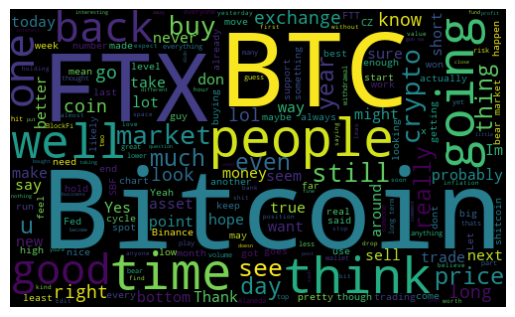

In [16]:
# Wordcloud

# Creating a DataFrame variable which indludes the rows that contain 'positive' comments. 
positive_comments = comment_vaders[comment_vaders['sentiment'] == 'Positive']

#Joining all positive comments together
positive_words = ' '.join(comment for comment in positive_comments['comment'])

#Creating the wordcloud for positive comments
wordCloud1 = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(positive_words)

# Let's see the wordcloud
plt.imshow(wordCloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

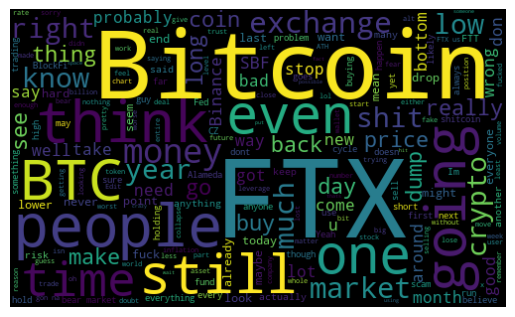

In [17]:
#Same process as the above, but with negative comments instead of positive comments.

negative_comments = comment_vaders[comment_vaders['sentiment'] == 'Negative']

negative_words = ' '.join(comment for comment in negative_comments['comment'])
wordCloud2 = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(negative_words)

plt.imshow(wordCloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

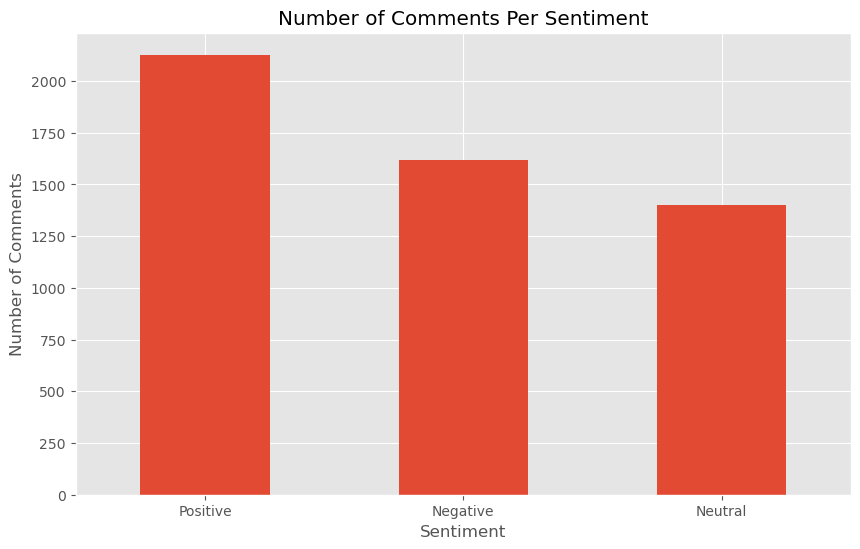

In [18]:
# Bar plot 
plt.figure(figsize=[10, 6])
comment_vaders['sentiment'].value_counts().plot(kind='bar')
plt.title('Number of Comments Per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')

ax = plt.subplot()
ax.set_xticks(range(3))
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'], rotation=0)
plt.show

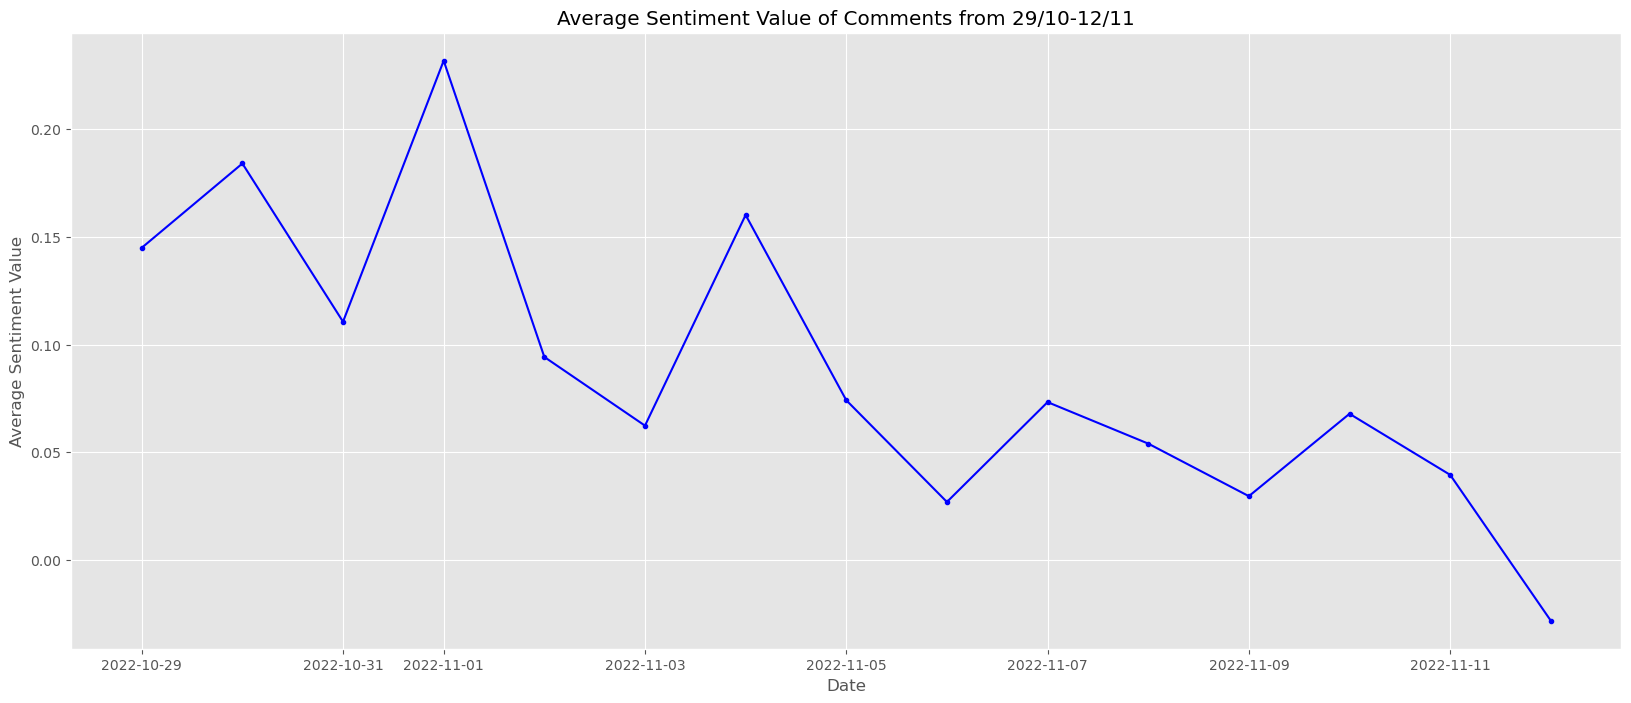

In [19]:
# Average compound value (i.e overall sentiment value of each comment) linegraph over time

# First, create date column in our comment_vaders table
comment_vaders['date'] = pd.to_datetime(comment_vaders['datetime']).dt.date

# Use groupby to create table with dates as rows and avg. compound value per day as values
compound_per_day = comment_vaders.groupby('date').compound.mean().reset_index()
compound_per_day

# Plot a line graph with dates on x-axis and average sentiment value (compound) on y-axis
plt.figure(figsize=[20, 8])
ax = plt.subplot()
plt.plot(compound_per_day['date'], compound_per_day['compound'], marker='.', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Value')
plt.title('Average Sentiment Value of Comments from 29/10-12/11')

plt.show()


[Text(0, 0, '2022-10-29'),
 Text(1, 0, '2022-10-30'),
 Text(2, 0, '2022-10-31'),
 Text(3, 0, '2022-11-01'),
 Text(4, 0, '2022-11-02'),
 Text(5, 0, '2022-11-03'),
 Text(6, 0, '2022-11-04'),
 Text(7, 0, '2022-11-05'),
 Text(8, 0, '2022-11-06'),
 Text(9, 0, '2022-11-07'),
 Text(10, 0, '2022-11-08'),
 Text(11, 0, '2022-11-09'),
 Text(12, 0, '2022-11-10'),
 Text(13, 0, '2022-11-11'),
 Text(14, 0, '2022-11-12')]

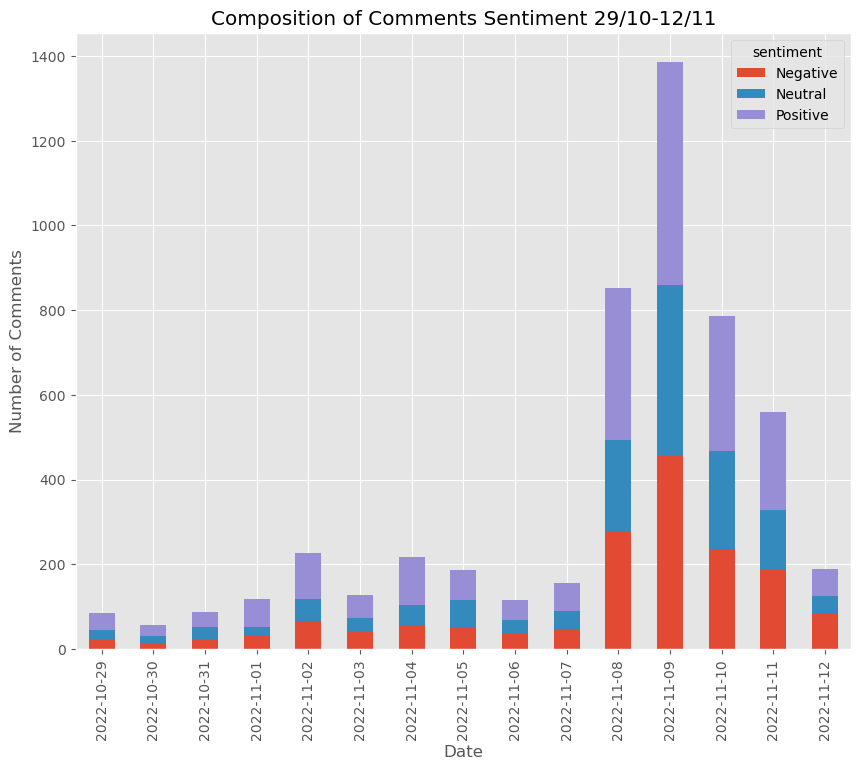

In [20]:
# Stacked bar over time

sentiment_count_daily = comment_vaders.groupby('date') \
                                      .sentiment.value_counts() \
                                      .unstack().fillna(0) \
                                      .reset_index() #reset index to turn into df object rather than a series.

ax = sentiment_count_daily[['Negative', 'Neutral', 'Positive']].plot(kind='bar', 
                                                                stacked=True, 
                                                                figsize=[10,8],
                                                                title='Composition of Comments Sentiment 29/10-12/11',
                                                                xlabel='Date',
                                                                ylabel='Number of Comments',
                                                                )
ax.set_xticklabels(sentiment_count_daily['date'])


## Conclusions

This project was able to answer some of the questions posed in the beginning:

- What is the composition of the sentiment of comments when organised into positive, neutral and negative comments?
    - The majority of comments were positive (2127, 41%) vs negative (1616, 31%) and neutral (1399, 27%). The count for each sentiment was determined by the threshold that I set myself (positive compound score for positive, 0 for neutral and negative integer for a negative sentiment). Should this threshold be adjusted then the composition would differ.
- Does the sentiment score increase or decrease over time?
    - There is a around a 120% decrease in average sentiment value from 0.15 to -0.03 from 29/10 to the 12/11. There is also a general downward trend in average sentiment as shown in the line graph.
    - However, composition of comment sentiment on daily basis remains fairly stable. Although the downward trend in average sentiment value from the 4th November onwards could be attributed to the relative increase in share of negative comments.
- Does an increase or decrease in the sentiment score correlate with the collapse of the cryptocurrency exchange FTX?
    - The news of FTX going down started to break on the 07/11/22 and became common knowledge by the 08//11/22. As we can see, there is a large increase in the volume of comments of the 8th November. FTX crashing likely sparked discussion here.
    - The wordclouds show that mentions of FTX are prominent in both postive and negative comments. FTX features more in negative comments however. This indicates that FTX crashing is more associated with negative sentiment.
    - FTX could be a factor in the downward trend in average sentiment from the 7th November onwards.

## Further Research and Final Remarks

This dataset only included observations from a 14-day period. As such any changes in sentiment value over a longer period of time are beyond the scope of this analysis. For further insight into changes in sentiment intensity, this analysis could be conducted with analysis of comments over a longer period.

Further research could involve an comparison of sentiment changes across time along with change in the stock price of bitcoin to see whether changes in sentiment correlate with changes in Bitcoin price/expectations.

This analysis involved the use of the VADER sentiment analysis model. There are some limitations to VADER. VADER works by analysing the sentiment of individual tokens. Sentences that include more negative tokens than positive tokens will be deemed as having a more negative overall sentiment. However there may be sentences which contain lots of negative words but, when interpreted by a human, may be deemed as having an overall positive sentiment. The inverse may also be true of sentences with lots of positive tokens. Therefore, analysing the sentiment of text using VADER is not always accurate. 